# Deutsch-Jozsa
Input: A number $n$ hidden function $f:\{bit\}^{* n} \to \{0,1\}$, where $bit$ is either $0$ or $1$. It is given that this function is either constant or balanced - either it outputs all $0$'s or $1$'s or both exactly the same number of times.  <br> 
Requirement: An efficient algorithm which figures out whether the function is constant or balanced. <br>
Comment: We want to be one hundred person confident with our answer, and to ensure that with a classical case, we would need to make atleast $2^{n-1} + 1$ calls to the function. Here we show how the same is possible with just $\textit{one}$ query.

In [2]:
from qiskit import * 
from qiskit.visualization import plot_histogram
%matplotlib inline 
import numpy as np
import qiskit.quantum_info as qi

In [3]:
case = 'balanced'
n = 4

We make the oracle for our algorithm.

In [4]:
circ_oracle = QuantumCircuit(n+1)
if case == 'balanced':
    num = np.random.randint(1,2**n)
    numstr =  format(num,'0' + str(n) +'b')
    for i in range(len(numstr)):
        if numstr[i] == '1':
            circ_oracle.x(i)
    for j in range(0,n):
            circ_oracle.cx(j,n)
    for i in range(len(numstr)):
        if numstr[i] == '1':
            circ_oracle.x(i)
if case == 'constant':
    op = np.random.randint(2)
    if op == 1:
        circ_oracle.x(n)
circ_oracle.name = '$O$'


We begin with initialising the default state,
$$|\psi_0\rangle = |0\rangle^{\otimes(n+1)}$$

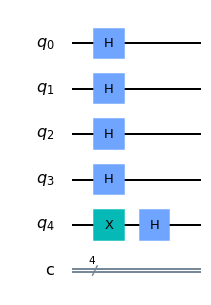

In [5]:
circ = QuantumCircuit(n+1,n)
circ.x(n)
for j in range(0,n+1):
    circ.h(j)
circ.draw('mpl')

Then we apply the NOT gate on the $(n+1)^{\text{th}}$ qubit,
$$|\psi_1\rangle = |1\rangle|0\rangle^{\otimes n}$$
Now with the hadamard gate,
$$|\psi_3\rangle = \frac{1}{\sqrt{2^{n+1}}}(|0\rangle - |1\rangle)\otimes\sum_{x=0}^{2^{n}-1}|x\rangle$$
Next we apply the oracle to this state.

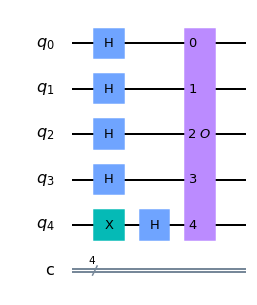

In [6]:
circ.append(circ_oracle,range(0,n+1))
circ.draw('mpl')    

We now have the quantum state,
$$|\psi_4\rangle = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1}(|f(x)\rangle - |1 \otimes f(x)\rangle)|x\rangle$$
that is,
$$|\psi_4\rangle = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1}(-1)^{f(x)}(|0\rangle - |1\rangle)|x\rangle$$

In [7]:
for j in range(0,n):
    circ.h(j)

Now we have, 
$$|\psi_5\rangle = \frac{1}{2^n\sqrt{2}}\left[\sum_{y=0}^{2^n-1}\left\{\sum_{x=0}^{2^n-1}(-1)^{f(x)}(-1)^{x.y}\right\}|y\rangle\right]\otimes(|0\rangle - |1\rangle)$$
Now we see that the the probability of measuring $|0\rangle^{\otimes n}$  evaluates to $1$ if $f$ is constant and to $0$ if $f$ is balanced.

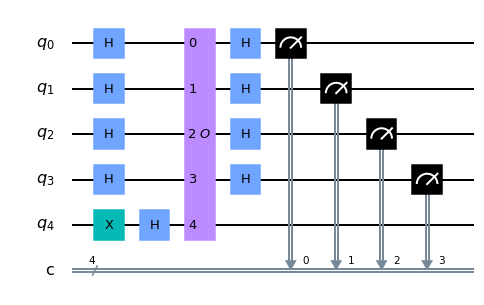

In [8]:
for i in range(n):
    circ.measure(i,i)
circ.draw('mpl')

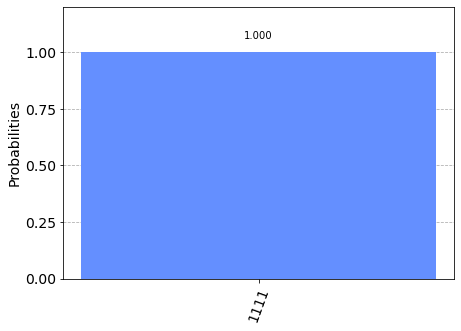

In [9]:
sim = Aer.get_backend('qasm_simulator')
job = execute(circ,sim,shots=1)
result = job.result()
count = result.get_counts()

plot_histogram(count)

ba dm tss! We get $|0\rangle^{\otimes n}$ as predicted!